In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import PIL
from PIL import Image
import os
import csv
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras import models
from keras import layers
from keras.models import load_model
from tensorflow.keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator

In [29]:
model = load_model('model2.h5')


In [30]:
labels = {
    0:"A",1:"Agol",2:"Amin",3:"B",4:"Beskonechnost",5:"C",6:"Centar",7:"CH",8:"Cvekje",9:"D",10:"Delenje",
    11:"DJ",12:"Dopir",13:"DZ",14:"E",15:"F",16:"Fizika",17:"G",18:"H",19:"I",20:"Jas",21:"Javanje",22:"K",
    23:"Kolache",24:"Korona",25:"Krst",26:"Kukja",27:"L",28:"LJ",29:"M",30:"Mnogu",31:"N",32:"NJ",33:"O",34:"P",
    35:"Peperutka",36:"Pritisok",37:"Prst",38:"R",39:"Rob",40:"S",41:"Sever",42:"SH",43:"Sida",44:"Sin",45:"Svekja",
    46:"T",47:"Telefon",48:"TojTaaToa",49:"U",50:"V",51:"Valkano",52:"Vilushka",53:"Z",54:"Zamenki",55:"ZH",56:"Zholtica",57:"Zoshto"
}

In [31]:
test = pd.read_csv("test.csv")

In [32]:
test_labels = test['target']

In [33]:
test_labels_new = np_utils.to_categorical(test_labels)

In [34]:
test_paths = test['image_path']

In [35]:
test['target'] = test['target'].apply(str)

In [36]:
test_datagen = ImageDataGenerator()

In [37]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='image_path',
    y_col='target',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',shuffle=False)

Found 67 validated image filenames belonging to 58 classes.


In [38]:
files=test_generator.filenames
class_dict=test_generator.class_indices 
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key 

In [39]:
predictions = model.predict(test_generator)

2/2 [==============================] - 1s 38ms/step


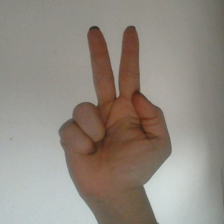

In [40]:
image1 = Image.open(test_generator.filenames[58]).resize((224,224))
image1

In [41]:
image1 = np.array(image1)

In [42]:
image1 = image1.reshape(1,224,224,3)

In [43]:
predictions1 = model.predict(image1)

1/1 [==============================] - 0s 138ms/step


In [44]:
for i, p in enumerate(predictions1):
    index=np.argmax(p)
    class_=rev_dict[index]
    num = int(float(class_))
    print('Predicted class is',labels[num],'with index',class_)

Predicted class is Zholtica with index 56.0


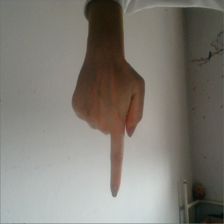

In [45]:
image2 = Image.open(test_generator.filenames[59]).resize((224,224))
image2

In [46]:
image2 = np.array(image2)

In [47]:
image2 = image2.reshape(1,224,224,3)

In [48]:
predictions2 = model.predict(image2)

1/1 [==============================] - 0s 35ms/step


In [49]:
for i, p in enumerate(predictions2):
    index=np.argmax(p)
    class_=rev_dict[index]
    num = int(float(class_))
    print('Predicted class is',labels[num],'with index',class_)

Predicted class is V with index 50.0


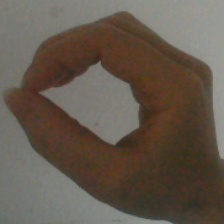

In [50]:
image3 = Image.open(test_generator.filenames[66]).resize((224,224))
image3

In [51]:
image3 = np.array(image3)


In [52]:
image3 = image3.reshape(1,224,224,3)

In [53]:
predictions3 = model.predict(image3)

1/1 [==============================] - 0s 34ms/step


In [54]:
for i, p in enumerate(predictions3):
    index=np.argmax(p)
    class_=rev_dict[index]
    num = int(float(class_))
    print('Predicted class is',labels[num],'with index',class_)

Predicted class is H with index 18.0
